In [114]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import os
source="C:/t.csv"
dest_directory="D:/cleaned"

In [115]:
data=pd.read_csv(source)

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [117]:
columns=['Unnamed: 0','Partner_Reporter','source','yearmonth','product_code','currency','countryo','year','month','ParRepYM','YearWeeknum','YearMonth','Month','Time','TimeRow']

In [148]:
def clean_data(df,columns):
    df=df.drop(columns,axis=1)
    new=df.dropna()
    return new


In [149]:
new_data=clean_data(data,columns)

In [150]:
new_data.head()

,reporter,partner,value,weight_unit,quantity,rate,pork,primal,subprimal,cor_Value,...,USKill,SowKillGer,SowKillIRE,SowKillGB,EUProdkg,EUProdhd,EUDead_Weightkg,USDeadWeight_y,USProdhd,USProdkg
38258,Canada,Angola,79123.0,MT,79.325,0.623707,203.0,20322.0,2032200.0,53111.11034,...,1995900,16119.0,1240.0,4503.0,2007.52,22303.94,90.007416,93.093169,9146600,851485983.9
38259,Canada,Angola,79123.0,MT,79.325,0.623707,203.0,20322.0,2032200.0,53111.11034,...,2434500,25167.0,2624.0,6319.0,2007.52,22303.94,90.007416,93.093169,9146600,851485983.9
38260,Canada,Angola,79123.0,MT,79.325,0.623707,203.0,20322.0,2032200.0,53111.11034,...,2418800,20994.0,2144.0,5840.0,2007.52,22303.94,90.007416,93.093169,9146600,851485983.9
38261,Canada,Angola,79123.0,MT,79.325,0.623707,203.0,20322.0,2032200.0,53111.11034,...,2297400,20521.0,2037.0,5114.0,2007.52,22303.94,90.007416,93.093169,9146600,851485983.9
38262,Canada,Australia,654322.0,MT,219.707,0.623707,203.0,20319.0,2031900.0,439211.96040,...,1995900,16119.0,1240.0,4503.0,2007.52,22303.94,90.007416,93.093169,9146600,851485983.9


In [151]:
if not os.path.exists(dest_directory):
    os.makedirs(dest_directory)

In [152]:
 cols = list(new_data.select_dtypes(include=['category','object']))

In [153]:
def encoding(df):
    cols = list(new_data.select_dtypes(include=['category','object']))
    le=LabelEncoder()
    for col in cols:
        try:
            df[col]=le.fit_transform(df[col])
        except:
            print('Error encoding column: '+col)
    return df

In [154]:
data_clean=encoding(new_data)

In [155]:
data_clean.to_csv(dest_directory+'/pork_cleaned.csv')

PermissionError: [Errno 13] Permission denied: 'D:/cleaned/pork_cleaned.csv'

In [198]:
targets=data_clean[['reporter','partner']].values

In [199]:
features=data_clean.drop(['reporter','partner'],axis=1)

In [200]:
from sklearn.model_selection import train_test_split

In [205]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.33, random_state=42)

In [203]:
from sklearn.ensemble import RandomForestClassifier

In [204]:
clf = RandomForestClassifier(n_estimators=25)

In [172]:
clf.fit(X_train,y_train)

C:\Users\mani\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=25, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [173]:
score=clf.score(X_test,y_test)

In [174]:
print(score)

0.976247424634


In [177]:
corr=np.corrcoef(features.values,rowvar=0)

C:\Users\mani\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\mani\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [181]:
corr.view

<function ndarray.view>

In [183]:
import seaborn as sns

C:\Users\mani\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


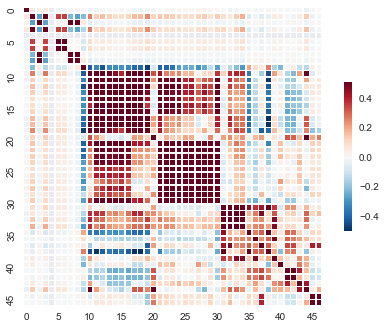

In [187]:
sns.heatmap(corr, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5})

In [188]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [191]:
def calculate_vif_(X):

    '''X - pandas dataframe'''
    thresh = 5.0
    variables = range(X.shape[1])

    for i in np.arange(0, len(variables)):
        vif = [variance_inflation_factor(X[variables].values, ix) for ix in range(X[variables].shape[1])]
        print(vif)
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            del variables[maxloc]

    print('Remaining variables:')
    print(X.columns[variables])
    return X

In [197]:
from sklearn.multioutput import MultiOutputClassifier

In [207]:
forest = RandomForestClassifier(n_estimators=100, random_state=1, verbose= True)

In [208]:
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)

In [ ]:
multi_target_forest.fit(X_train, y_train).score(X_test, y_test)